# 第十章 箱型图
## 10.1 简介
在本章中将创建箱型图列表,将从一个基本的箱型图列表开始，一步一步来解释添加到代码中的所有定制功能，如图 10-1所示。

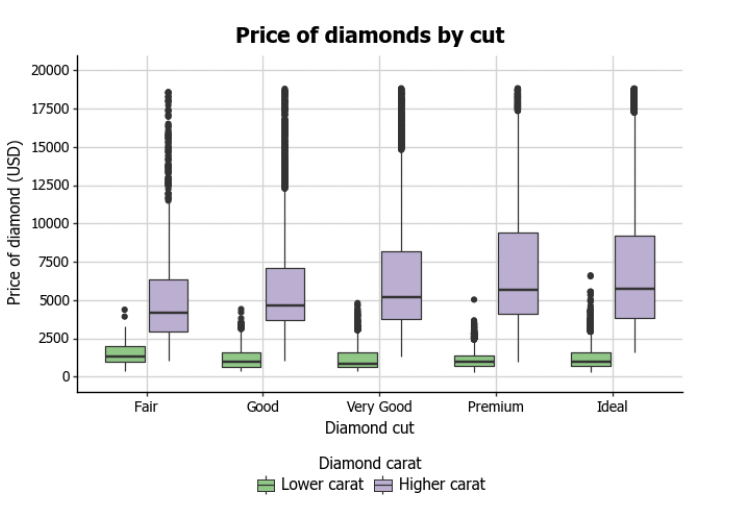

第一步是导入所有需要的包。为此，我们需要：
- pandas和它的DataFrame类来读入和处理数据。
- plotnine来获取数据并创建图表；以及
- numpy，以便在图表中进行一些基本的数学运算。

还可以使用 plotnine 的 figure_size 函数来改变图形的大小。在本章中调整了图的大小，使它们显示得更加 整洁

In [1]:
import numpy as np
import pandas as pd
import plotnine
plotnine.options.figure_size=(7.5, 4.2)
from plotnine import *
from plotnine import data
from pandas import DataFrame

然后我们需要加载数据，如下所示。

In [2]:
diamonds = data.diamonds

## 10.2 ggplot的基本结构
为了初始化一个箱型图，需要告诉ggplot diamonds是数据，并指定X轴是cut变量，Y轴是price变量。 把变量放在了一个叫做aes的方法中。aes是审美映射的简称，aes决定了不同的变量如何被映射到图表的各个部分。 ggplot将cut映射到x轴上，将price映射到y轴上。目前图中没有任何东西，如图 10-2所示。为了渲染数据，需要告诉ggplot想如何直观地表现它。

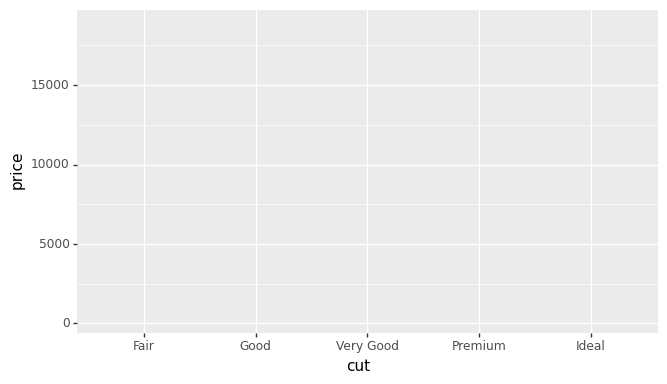

<ggplot: (105884471748)>

In [3]:
p10 = ggplot(diamonds, aes("cut", "price"))
p10

## 10.3 基本boxplot
可以使用geom_boxplot()原语来绘制箱型图

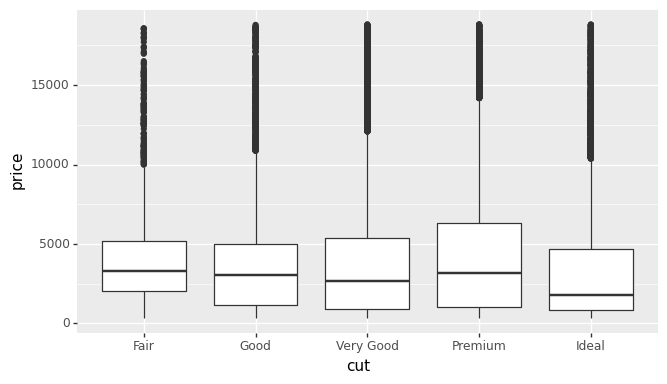

<ggplot: (105884596053)>

In [4]:
p10 = ggplot(diamonds, aes("cut", "price")) + geom_boxplot()
p10

## 10.4 自定义轴标签
为了改变轴的标签，可以使用xlab和ylab方法可以添加所需的名称作为参数，如图 10-3所示。

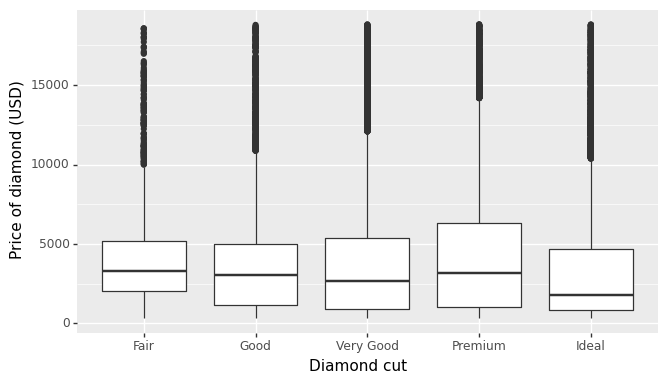

<ggplot: (105884780264)>

In [5]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot()
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
)
p10

ggplot还允许使用多行名称（在坐标轴和标题中）。在这里改变了Y轴的标签，使其超过了两行，使用了\n字符来断开这一行，如图 10-4所示。

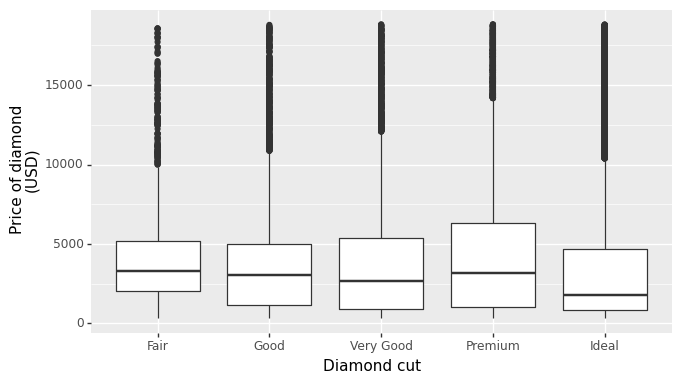

<ggplot: (105884762597)>

In [6]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot()
+ xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
)
p10

## 10.5 改变轴的刻度线
要改变x轴的刻度线，可以使用scale_x_continuous方法。 同样地，要改变Y轴，可以使用scale_y_continuous方法。这里把Y轴改为每2500美元，而不是默认的5000美元。可以使用break选项来改变断点，该选项以一个值的列表作为参数 作为参数。可以使用numpy的range函来缩短手动输入整个列表的时间。 numpy的range函数可以从选择的起始值、终止值和步长值中生成一个序列。 请注意，由于Python的索引功能，需要将停止值设置为比想要的最大值多一。 同样地，可以使用limit参数来定义轴的最小和最大 值。在scale_y_continuous 方法中，将最大值增加到20000美元，如图 10-5所示。

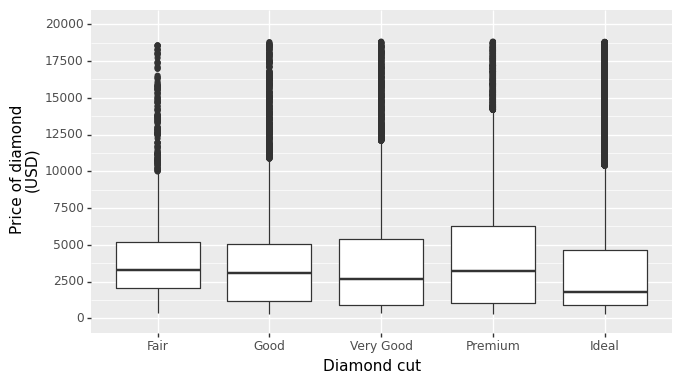

<ggplot: (105884943318)>

In [7]:
p10 = (
ggplot(diamonds, aes("cut", "price")) + geom_boxplot()
+ xlab("Diamond cut") + ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500), limits=[0, 20000])
)
p10

## 10.6 添加标题
为了添加一个标题，在ggtitle中把图形的名称作为一个字符串参数输入的结果，如图 10-6所示。

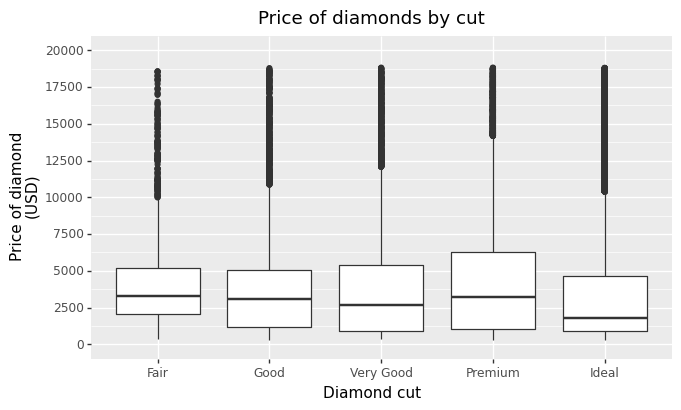

<ggplot: (105884776503)>

In [8]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot()
+ xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
)
p10

## 10.7 改变方框的颜色
为了改变盒状图的线条和填充颜色，在 geom_boxplot() 的颜色和填充参数中添加一个有效的颜色。调色板，ggplot 识别matplotlib的全部颜色命名。 把框线和填充物分别改为 rebecca紫天空蓝，如图 10-7所示。

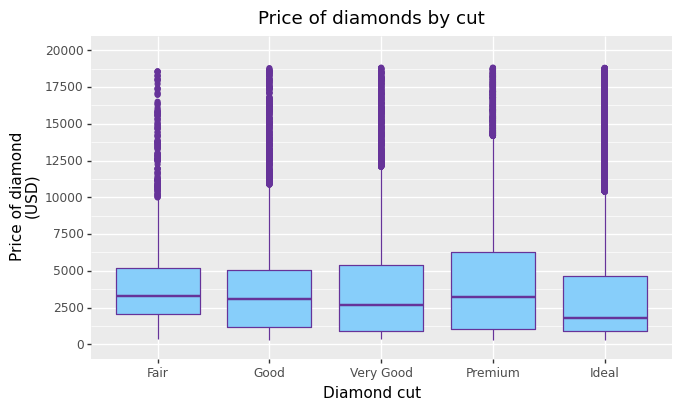

<ggplot: (105886126788)>

In [9]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="rebeccapurple", fill="lightskyblue")
+ xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
)
p10

也可以指定精确的 HEX颜色，将它们作为一个字符串，，例如，"#FFFFFF"。 下面，用HEX代码为填充和线条使用两种蓝色，如图 10-8所示。

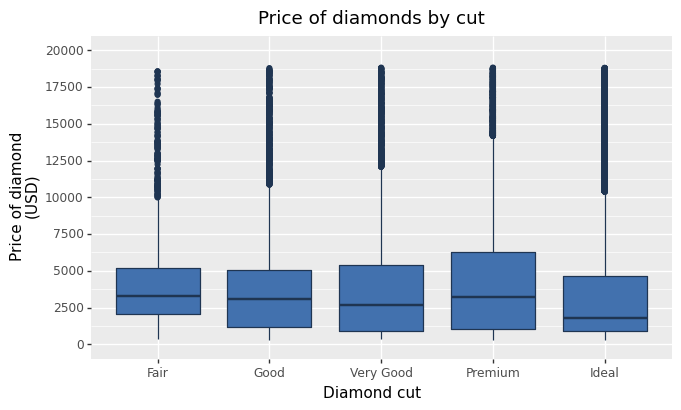

<ggplot: (105886291309)>

In [10]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE")
+ xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
)
p10

也可以使用geom_boxplot()中的参数alpha来指定方框填充区域的透明程度。，其范围从0到1，如图 10-9所示

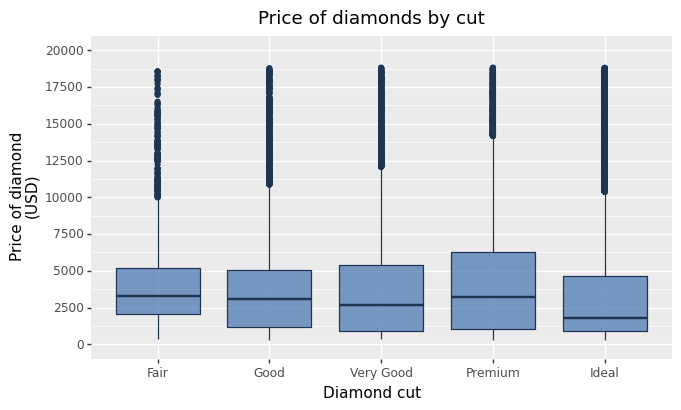

<ggplot: (105886385014)>

In [11]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE",
alpha=0.7)
+ xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
)
p10

最后，也可以改变离群点的外观，使用参数 outlier.color和outlier.shape来改变颜色和形状。plotnine 的形状参数与 matplotlib 中的参数相同。这里将使离群值变成小实心圆（使用outlier.shape="."），并将其染成钢蓝色（使用 outlier.color="steelblue"），如图 10-10所示。

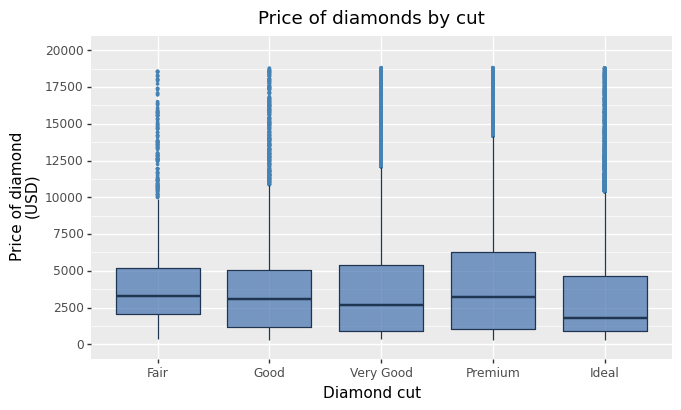

<ggplot: (105888872701)>

In [12]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(
colour="#1F3552",
fill="#4271AE",
alpha=0.7,
outlier_shape=".",
outlier_colour="steelblue",
)+
xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
)
p10

## 10.8 使用白色主题
也可以通过通过添加 theme_bw()来改变图表的整体外观 ，如图 10-11所示。

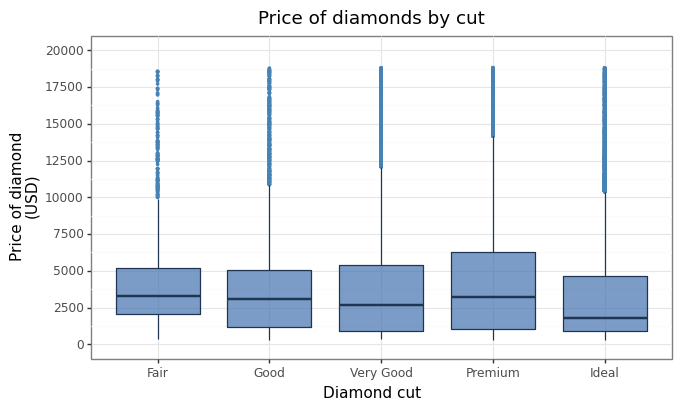

<ggplot: (105889043920)>

In [13]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(
colour="#1F3552",
fill="#4271AE",
alpha=0.7,
outlier_shape=".",
outlier_colour="steelblue",
)+
xlab("Diamond cut")
+ ylab("Price of diamond\n(USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme_bw()
)
p10

## 10.9 创建一个XKCD风格的图表
可以创建自己的主题，自己的主题具有非常高的定制化程度，包括允许使用导入字体。 plotnine 已经有一个 theme_xkcd() 实现，但这里还是从头开始创建了一个 可以使用主题中的其他方法选项来调整图表的整体外观， 为了创建这个图表，先需要下载XKCD字体，一旦有了改字体，就可以使用matplotlib.font_manager类matplotlib把它加载到 到Python中。

In [14]:
import matplotlib.font_manager as fm
fpath = "xkcd-Regular.otf"

由于这是一种导入的字体，不能在图形中直接改变其大小。 相反，需要改变导入的字体对象来改变其大小。由于希望标题和正文有不同的字体大小，需要创建两个不同的 字体对象，title_text和body_set。
然后可以在这些对象上调用方法，对于标题，将把字体改为18号，并使用 set_size()和set_weight方法将其改为粗体。同样地，将把正文的字号改为 改为12号。

In [15]:
# Create font objects
title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)
# Alter size and weight of font objects
title_text.set_size(18)
title_text.set_weight("bold")
body_text.set_size(12)

为了使图表看起来更像XKCD的艺术风格，将做一些更多的调整，如图 10-12所示。
- 改变 axis_line_x 和 axis_line_y 的值可以改变轴线的粗细
- 将 legend_key 的参数设置为 element_blank()，可以去除图例周围的方框。 摆脱图例周围的方框
- 为了去除网格线，需要改变四个参数的值。 panel_grid_major, panel_grid_minor, panel_border 和 panel_background。
- 为了使用刚导入的XKCD字体，需要改变plot_title和text的值。
- 将文本的颜色改为黑色（从其默认的灰色），要改变 axis_text_x 和 axis_text_y 的值。

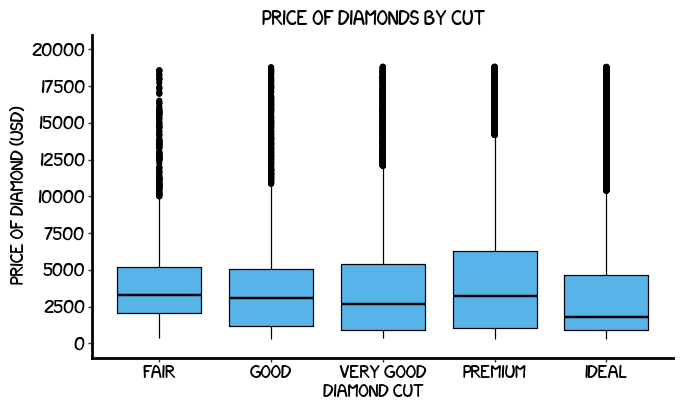

<ggplot: (105888847993)>

In [16]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="black", fill="#56B4E9")
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
axis_line_x=element_line(size=2, colour="black"),
axis_line_y=element_line(size=2, colour="black"),
panel_grid_major=element_blank(),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
    panel_background=element_blank(),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
axis_text_x=element_text(colour="black"),
axis_text_y=element_text(colour="black"),
)
)
p10

## 10.10 使用 "583 "主题
ggplot软件包的一部分有更多的预建主题可供选择，下面应用了theme_538()。 它接近于FiveThirtyEight网站上的图形。在axe_538()的axis_title、plot_title和text中中使用了字体 "Atlas Grotesk "和 "Decima Mono Pro'，这只是为了使这些图表与网站上的一模一样，而且完全是可选的，如图 10-13所示。

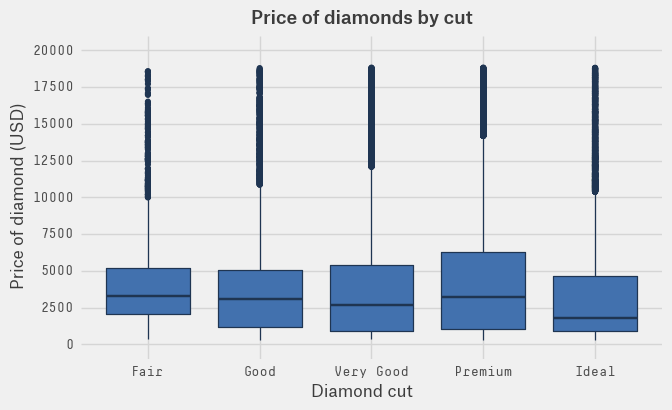

<ggplot: (105889042562)>

In [17]:
agm = "AtlasGrotesk-Medium.otf"
agr = "AtlasGrotesk-Regular.otf"
dp = "DecimaMonoPro.otf"

title_text = fm.FontProperties(fname=agm)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)
# Alter size and weight of font objects
title_text.set_size(16)
axis_text.set_size(12)
body_text.set_size(10)
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE")
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme_538()
+ theme(
axis_title=element_text(fontproperties=axis_text),
plot_title=element_text(fontproperties=title_text),
text=element_text(fontproperties=body_text),
)
)
p10

## 10.11 创建自己的主题
现在，已经探索了图表定制的一些可用选项，现在可以建立自己的完全定制的图表，如图 10-14所示。
- 改变 axis_line 的大小和颜色参数，可以加粗线条，并将其颜色改为黑色。 
- 改变传递给panel_grid_major的颜色参数意味着所有的主要网格线现在是浅灰色的。
- 同样地，通过改变 panel_grid_major 的参数来去除次要网格线和背景。 同样，通过改变 panel_grid_minor、panel_border 和 panel_background 的参数来移除次要网格线和背景
- 使用标准字体Tahoma

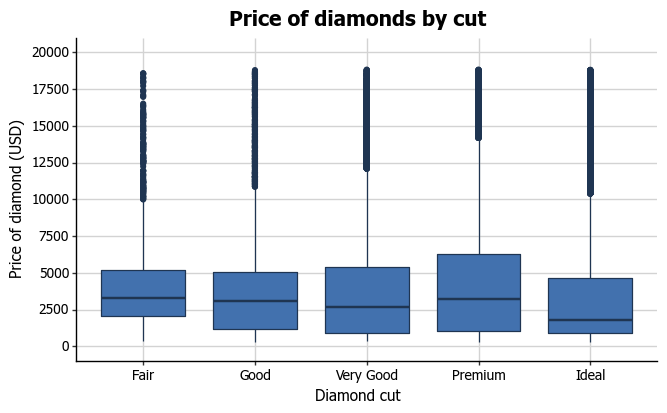

<ggplot: (105889198487)>

In [18]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE")
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p10


## 10.12 箱型图的额外功能
可以为箱型图添加一个额外的功能，就是在每个箱型图上叠加该组的所有点，以便了解该组的样本情况，如图 10-15所示。 组的所有点叠加在每个箱型图上，以便了解该组的样本情况。 这可以通过添加geom_jitter()方法来实现。由于本例的钻石是是一个很大的数据集，先拿一个小的样本来说明这个问题。

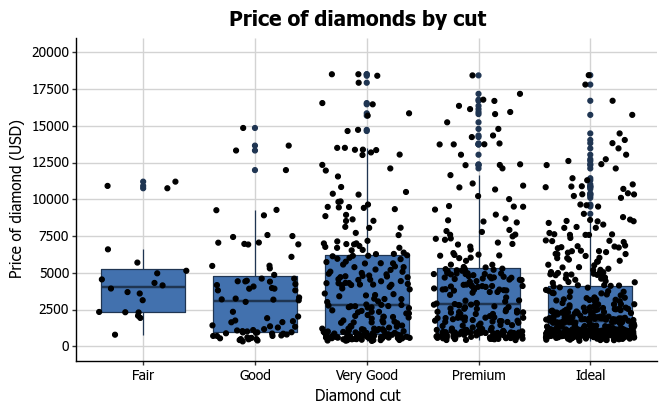

<ggplot: (105884813409)>

In [19]:
diamonds_sample = diamonds.sample(1000)
p10 = (
ggplot(diamonds_sample, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE")
+ geom_jitter()
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
    plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p10

可以看到，Fair组的样本量比其他组别少。 表明它提供的信息可能不如其他类型那么可靠。 可以对箱型图做的另一件事是在中位数所在的盒子上添加一个缺口，以便更清楚地显示数据的分布情况。 中位数所在的盒子上添加一个缺口，以便更清楚地显示数据在IQR内的分布情况，如图 10-16所示。 在IQR内的分布情况可以通过向geom_boxplot() 原语添加参数notch=True来实现这一目的。

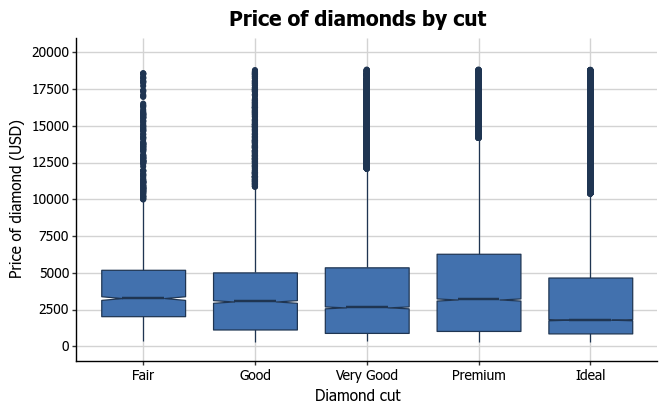

<ggplot: (105884641223)>

In [20]:
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE",
notch=True)
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)
)
p10

## 10.13 按另一变量分组
也可以很容易地通过另一个变量来分组箱型图，如图 10-17所示。这里有有两种选择，在单独的（面板）图中，或在同一图中分组。首先需要做一些数据处理工作。为了创建分组变量。 将对carat进行中位数分割，使其成为分类变量，并将其变成一个新的标记的因子变量，名为carat_c。 为了通过这个分类的carat变量生成一个面板图，添加了 facet_grid(".~carat_c")方法来绘制。注意，与R的ggplot不同，需要在facet_grid(".~carat_c")中加入参数，需要将facet_grid中的参数放在引号里。。

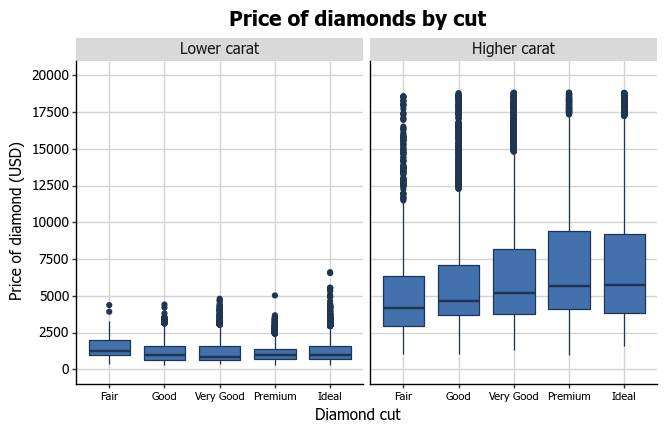

<ggplot: (105884765968)>

In [21]:
diamonds["carat_c"] = pd.qcut(
diamonds["carat"], 2, labels=["Lower carat", "Higher carat"]
)
p10 = (
ggplot(diamonds, aes("cut", "price"))
+ geom_boxplot(colour="#1F3552", fill="#4271AE")
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=8),
axis_text_y=element_text(colour="black", size=10),
)+
facet_grid(". ~ carat_c")
)
p10

为了在同一幅图中绘制两个carat的分组，需要添加一些东西，如图 10-18所示。首先，在ggplot函数中，为aes添加一个fill=carat_c参数。其次，使用Color-Brewer中的方案改变颜色。 在这里使用了scale_fill_brewer方法，使用了定量的 scale Accent。

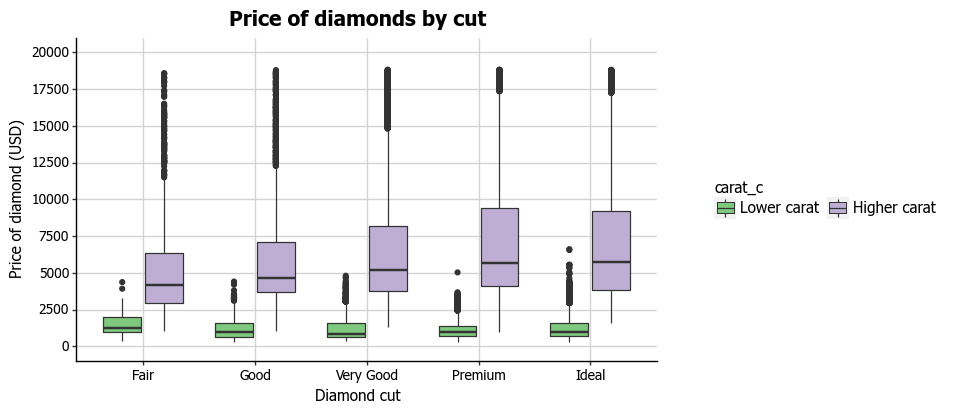

<ggplot: (105884785803)>

In [22]:
p10 = (
ggplot(diamonds, aes("cut", "price", fill="carat_c"))
+ geom_boxplot()
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
legend_direction="horizontal",
legend_box_spacing=0.4,
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
    plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)+
scale_fill_brewer(type="qual", palette="Accent")
)
p10

## 10.14 设置图例的格式
最后可以对图例进行格式化，如图 10-19所示。首先，可以通过添加legend_position="bottom "参数来将图例移到图表的下面。还可以 通过legend_title_align="center "使图例居中，可以用legend_box_spray来调整 使用 legend_box_spacing=0.4 来调整图例位置。可以用 legend_key=0.4来消除图例键后面的灰色背景，可以使用 legend_key=element_blank()消除图例键后面的灰色背景。最后，可以通过在scale_fill_brewer方法中添加参数name="Diamond carat "来修复标题。 

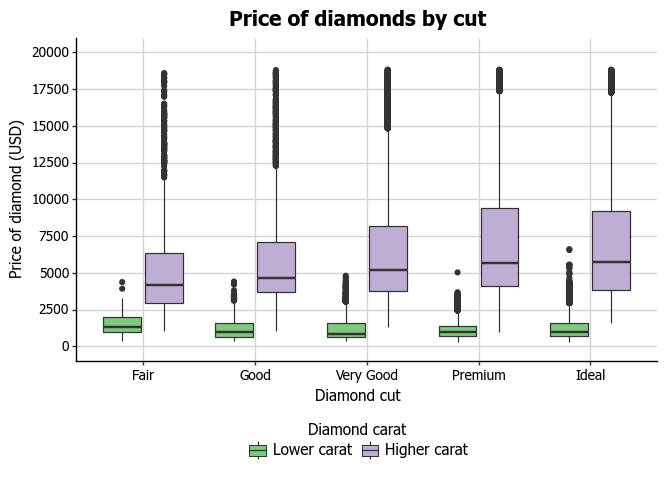

<ggplot: (105886294140)>

In [23]:
p10 = (
ggplot(diamonds, aes("cut", "price", fill="carat_c"))
+ geom_boxplot()
+ xlab("Diamond cut")
+ ylab("Price of diamond (USD)")
+ scale_y_continuous(breaks=np.arange(0, 20001, 2500),
                     limits=[0, 20000])
+ ggtitle("Price of diamonds by cut")
+ theme(
legend_position="bottom",
legend_direction="horizontal",
legend_title_align="center",
legend_box_spacing=0.4,
legend_key=element_blank(),
axis_line=element_line(size=1, colour="black"),
panel_grid_major=element_line(colour="#d3d3d3"),
panel_grid_minor=element_blank(),
panel_border=element_blank(),
panel_background=element_blank(),
plot_title=element_text(size=15, family="Tahoma",
face="bold"),
text=element_text(family="Tahoma", size=11),
axis_text_x=element_text(colour="black", size=10),
axis_text_y=element_text(colour="black", size=10),
)+
scale_fill_brewer(type="qual", palette="Accent",
name="Diamond carat")
)
p10